In [41]:
import yfinance as yf

In [42]:
sp500 = yf.Ticker("NVDA")

In [43]:
# Getting all data since the creation of the index
sp500 = sp500.history(period="max")

In [44]:
sp500.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.0,0.0
1999-01-29 00:00:00-05:00,0.038089,0.038209,0.036298,0.036298,244032000,0.0,0.0
1999-02-01 00:00:00-05:00,0.036298,0.037253,0.036298,0.037015,154704000,0.0,0.0
1999-02-02 00:00:00-05:00,0.036298,0.037253,0.033074,0.034149,264096000,0.0,0.0
1999-02-03 00:00:00-05:00,0.033671,0.035343,0.033432,0.034865,75120000,0.0,0.0


In [45]:
sp500.index

DatetimeIndex(['1999-01-22 00:00:00-05:00', '1999-01-25 00:00:00-05:00',
               '1999-01-26 00:00:00-05:00', '1999-01-27 00:00:00-05:00',
               '1999-01-28 00:00:00-05:00', '1999-01-29 00:00:00-05:00',
               '1999-02-01 00:00:00-05:00', '1999-02-02 00:00:00-05:00',
               '1999-02-03 00:00:00-05:00', '1999-02-04 00:00:00-05:00',
               ...
               '2025-05-06 00:00:00-04:00', '2025-05-07 00:00:00-04:00',
               '2025-05-08 00:00:00-04:00', '2025-05-09 00:00:00-04:00',
               '2025-05-12 00:00:00-04:00', '2025-05-13 00:00:00-04:00',
               '2025-05-14 00:00:00-04:00', '2025-05-15 00:00:00-04:00',
               '2025-05-16 00:00:00-04:00', '2025-05-19 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=6622, freq=None)

<Axes: xlabel='Date'>

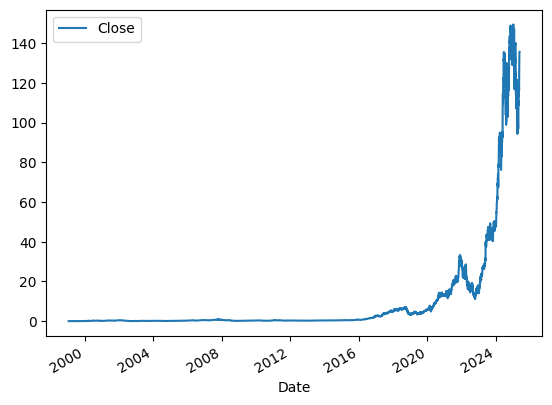

In [46]:
sp500.plot.line(y="Close", use_index=True)

In [47]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [48]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [49]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.041552
1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.038328
1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.038209
1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.038089
1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.036298
...,...,...,...,...,...,...
2025-05-13 00:00:00-04:00,124.980003,131.220001,124.470001,129.929993,330430100,135.339996
2025-05-14 00:00:00-04:00,133.199997,135.440002,131.679993,135.339996,281180800,134.830002
2025-05-15 00:00:00-04:00,134.289993,136.300003,132.660004,134.830002,226632600,135.399994


In [50]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [51]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.041552,1
1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.038328,0
1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.038209,0
1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.038089,0
1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.036298,0
...,...,...,...,...,...,...,...
2025-05-13 00:00:00-04:00,124.980003,131.220001,124.470001,129.929993,330430100,135.339996,1
2025-05-14 00:00:00-04:00,133.199997,135.440002,131.679993,135.339996,281180800,134.830002,0
2025-05-15 00:00:00-04:00,134.289993,136.300003,132.660004,134.830002,226632600,135.399994,1


In [40]:
# There is alot of historical data in other scenarios it is a good thing, but with stocks market it's bad because at some point the market could have shifted fundamentaly. An some of the old data is not so good for future prediction
sp500 = sp500.loc["2000-01-01":].copy()

In [52]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.041552,1
1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.038328,0
1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.038209,0
1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.038089,0
1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.036298,0
...,...,...,...,...,...,...,...
2025-05-13 00:00:00-04:00,124.980003,131.220001,124.470001,129.929993,330430100,135.339996,1
2025-05-14 00:00:00-04:00,133.199997,135.440002,131.679993,135.339996,281180800,134.830002,0
2025-05-15 00:00:00-04:00,134.289993,136.300003,132.660004,134.830002,226632600,135.399994,1


In [53]:
from sklearn.ensemble import RandomForestClassifier
# Later is good to trie with bigger n for more accurancie
# min_samples_split helps against overfitting but it cost accurancie
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# All of the rows except the last 100 will be in train
# The last 100 rows will be in test
# This have to be done to prevent leakage

# There is a more sophisticated way to do this split
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [54]:
from sklearn.metrics import precision_score

# Precision is good in this case because, it will tell us when we predictly right and when we has done it wrong
preds = model.predict(test[predictors])

In [55]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [56]:
precision_score(test["Target"], preds)

0.5064935064935064

In [57]:
# Improving the Model

In [58]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

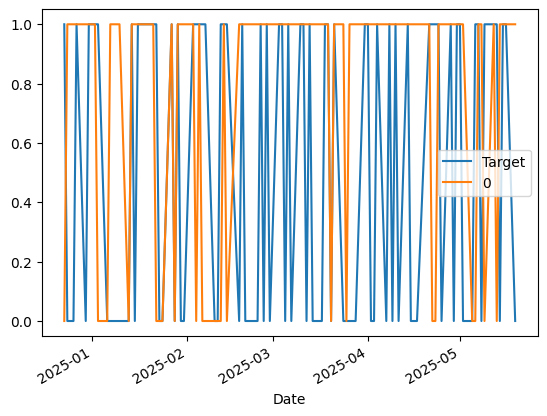

In [59]:
combined.plot()

In [60]:
# Backtesting System

In [61]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [62]:
# 2500 equals to 10 years of stock data
# 250 equals to 1 year of stock data

def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    # All of the years prier to the current year
    train = data.iloc[0:i].copy()
    # The current year
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [63]:
predictions = backtest(sp500, model, predictors)

In [64]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,2368
1,1754


In [65]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5153933865450399

In [66]:
# This algorithm is bad
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.52984
0,0.47016


In [67]:
# Additional Predictors

In [68]:
# Days prior to the actual day
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [69]:
sp500 = sp500.dropna()

In [70]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-01-15 00:00:00-05:00,0.094527,0.095292,0.091547,0.091547,904584000,0.085357,0,0.984386,1.0,0.979717,3.0,0.906372,32.0,0.453885,104.0,0.474865,470.0
2003-01-16 00:00:00-05:00,0.090171,0.091318,0.084135,0.085357,2039976000,0.082148,0,0.965011,0.0,0.928511,2.0,0.844110,31.0,0.426599,104.0,0.442657,469.0
2003-01-17 00:00:00-05:00,0.083065,0.084211,0.081078,0.082148,1058832000,0.080084,0,0.980839,0.0,0.918331,1.0,0.812207,30.0,0.413811,104.0,0.425916,469.0
2003-01-21 00:00:00-05:00,0.083676,0.085434,0.079855,0.080084,967356000,0.080161,1,0.987282,0.0,0.923510,1.0,0.792346,29.0,0.406730,103.0,0.415129,469.0
2003-01-22 00:00:00-05:00,0.079855,0.082225,0.079626,0.080161,550992000,0.082377,1,1.000481,1.0,0.955901,1.0,0.793078,30.0,0.410637,103.0,0.415437,470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-12 00:00:00-04:00,121.970001,123.000000,120.279999,123.000000,225023300,129.929993,1,1.026497,1.0,1.046595,3.0,1.072521,30.0,0.995200,132.0,2.223848,537.0
2025-05-13 00:00:00-04:00,124.980003,131.220001,124.470001,129.929993,330430100,135.339996,1,1.027399,2.0,1.075562,4.0,1.134417,30.0,1.049927,132.0,2.344231,537.0
2025-05-14 00:00:00-04:00,133.199997,135.440002,131.679993,135.339996,281180800,134.830002,0,1.020394,2.0,1.087435,4.0,1.182348,30.0,1.092090,132.0,2.436531,537.0


In [71]:
# Improving the Model

In [72]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [73]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  # Threashold
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [36]:
# We use the new predictores because the ratios will talk more about the change of the market when compared with just raw numbers
predictions = backtest(sp500, model, new_predictors)

In [37]:
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,2847
1.0,274


In [38]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5802919708029197

In [39]:
# 0.58 Is preaty good in this situation, and only in this situation, because we have data from 2000 to todays
# For actual investing and trading this model sucks :)